In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, _), (X_test, _) = mnist.load_data() #Load dataset

X_train = X_train.astype('float32') / 255.0 
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_val = X_train[-10000:]
X_train = X_train[:-10000]
encoding_dim = 32  

In [4]:
input_img = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [5]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [7]:
history = autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4484 - val_loss: 0.2520
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2404 - val_loss: 0.2066
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2015 - val_loss: 0.1836
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1814 - val_loss: 0.1697
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1679 - val_loss: 0.1593
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1588 - val_loss: 0.1510
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1511 - val_loss: 0.1442
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1441 - val_loss: 0.1386
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1386 - val_loss: 0.1339
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1347 - val_loss: 0.1298
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1304 - val_loss: 0.1260
Epoch 12/100
196/196 ━━━━━━━━━━━━━━━━━━━━

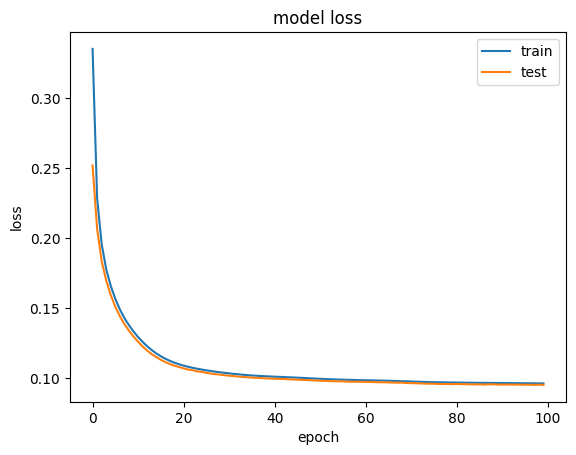

In [8]:
def plot_train_history_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

plot_train_history_loss(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


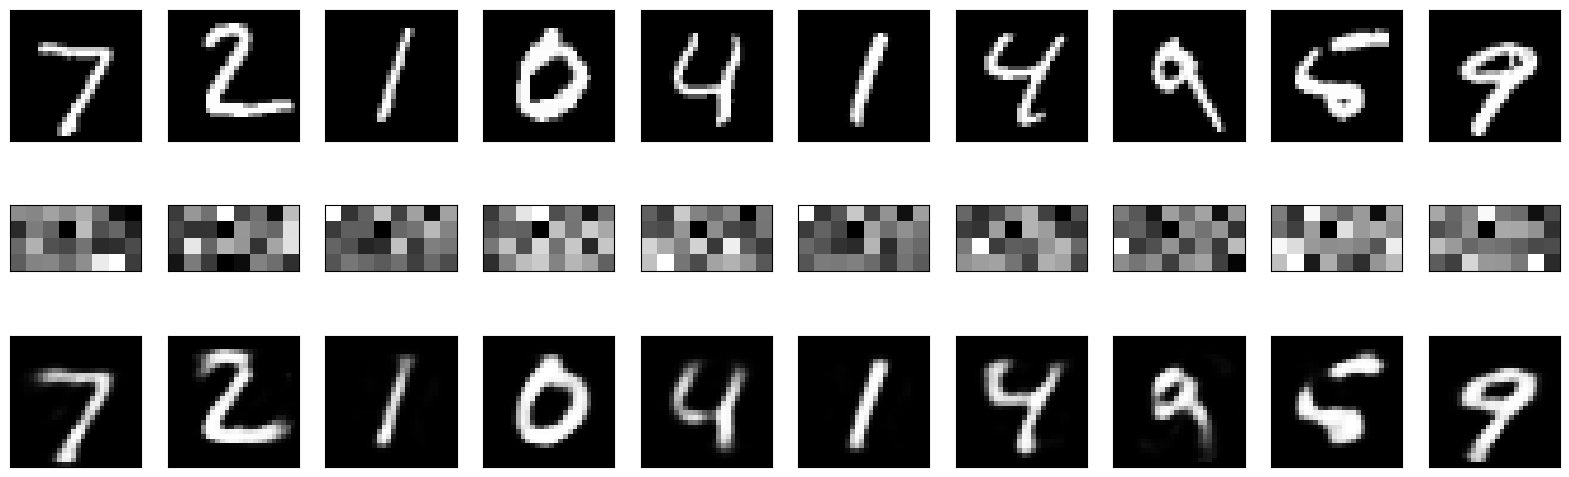

In [10]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

def display_reconstructed(x_test, encoded_imgs, decoded_imgs, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(4, 8), cmap='hot') 
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

display_reconstructed(X_test, encoded_imgs, decoded_imgs, 10)